In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
city = pd.read_csv('https://raw.githubusercontent.com/Mechmay/Hamoye/main/Capital_City_Fates.csv')

In [3]:
display(city.head())
display(city.info())
display(city.describe(include=[object]))


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


None

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [4]:
print(city.flag.value_counts())
print(city.columns)

train    32561
test     16281
Name: flag, dtype: int64
Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')


### Exploratory Data Analysis

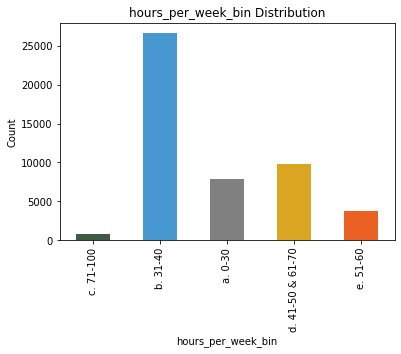

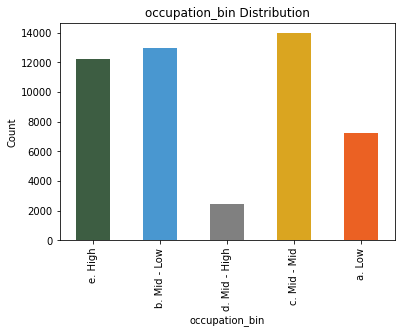

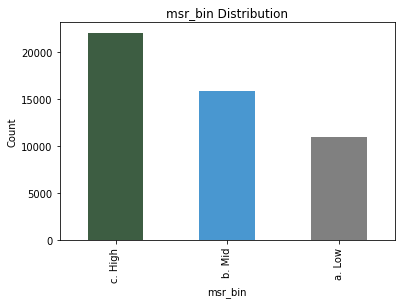

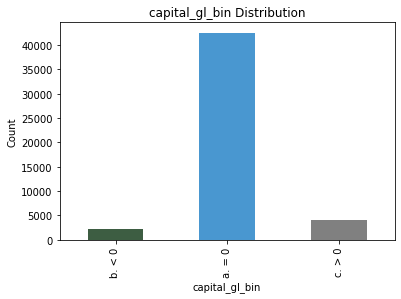

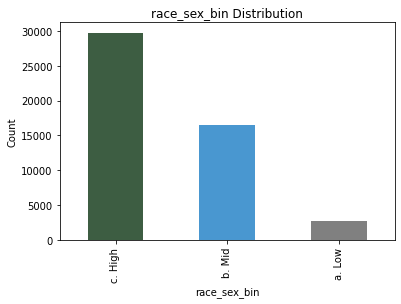

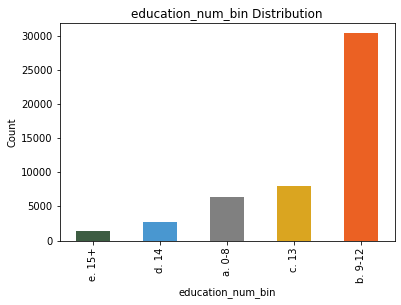

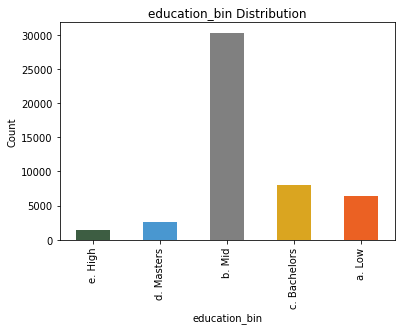

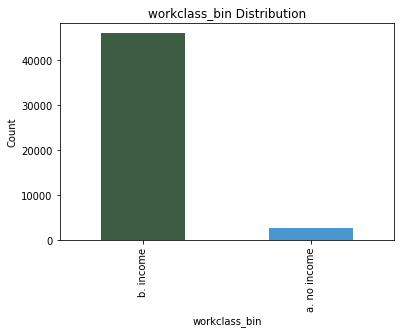

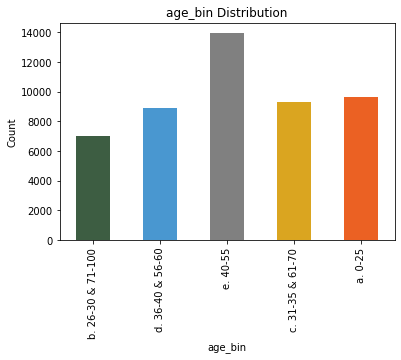

In [5]:
# Plot the bar graph of binnedage
colors = ['#3d5d42', '#4997d0', '#808080', '#daa520', '#eb6123', '#010b13', '#ffe4b5', '#f64a8a']
for k in range(9):
    city.iloc[:, k].value_counts(sort=False).plot(kind='bar', color = colors)


    # Label the bar graph 
    plt.title(city.columns[k] + ' Distribution')
    plt.xlabel(city.columns[k])
    plt.ylabel('Count') 

    # Show the bar graph 
    plt.show()

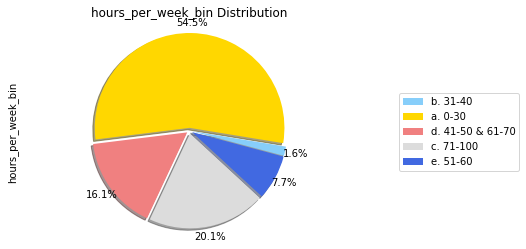

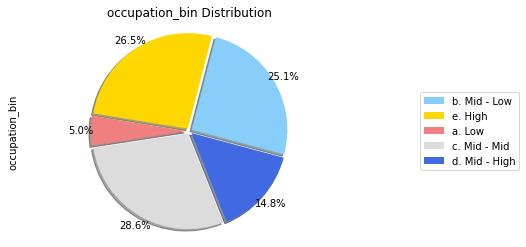

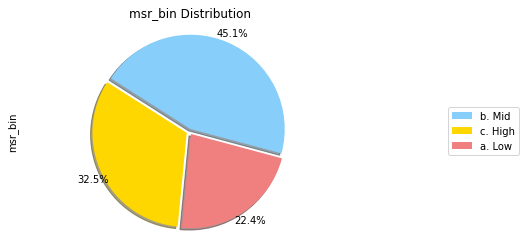

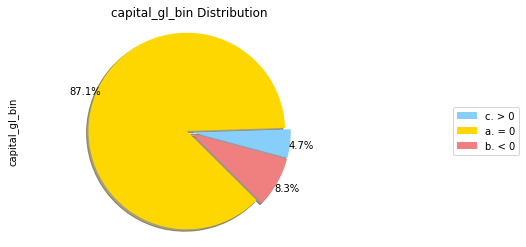

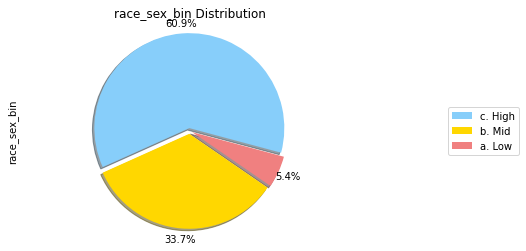

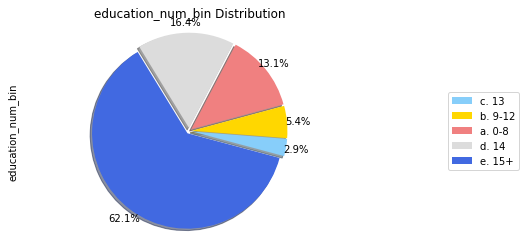

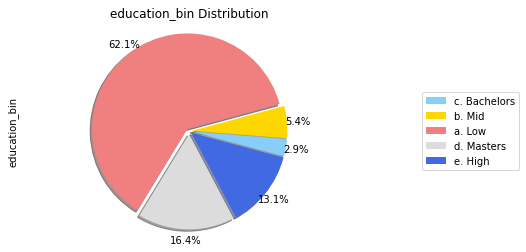

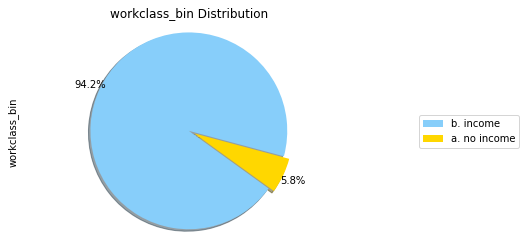

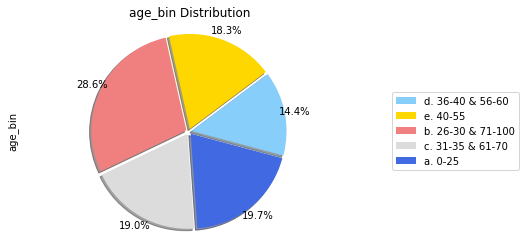

In [6]:
# to give a more proportionate visual, we'll use pie chart

plt.clf()
for k in range(9):
    labels = city.iloc[:, k].unique()
    colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
    explode = [0.03] * len(city.iloc[:, k].unique().tolist())
    city.iloc[:, k].value_counts(sort=False).plot(kind='pie', autopct = '%0.1f%%', shadow = True, explode = explode,
                                                  colors = colors,labeldistance = None, startangle=345, pctdistance=1.11)
    
    # Label the bar graph 
    plt.legend(labels,loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(city.columns[k] + ' Distribution')
    plt.axis('equal')

    plt.show()

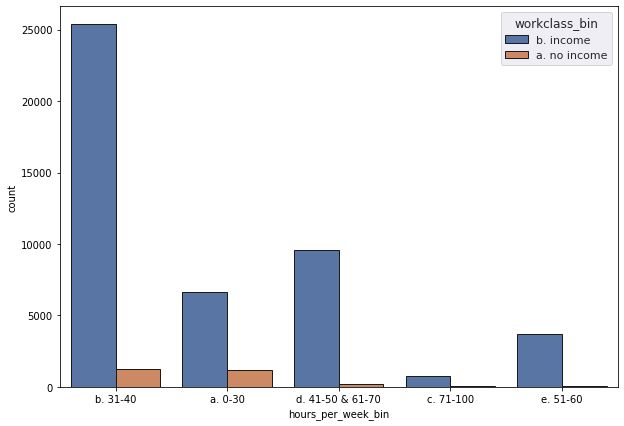

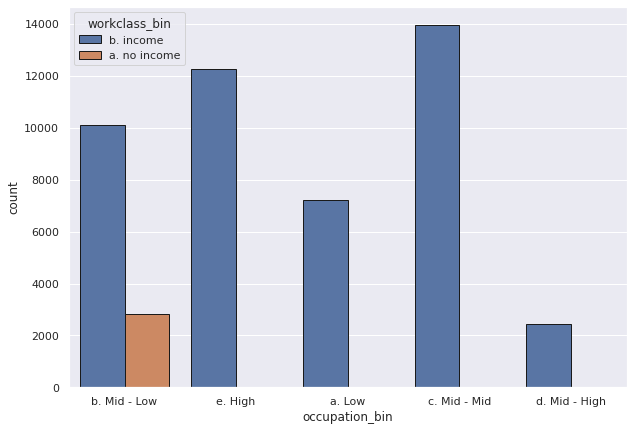

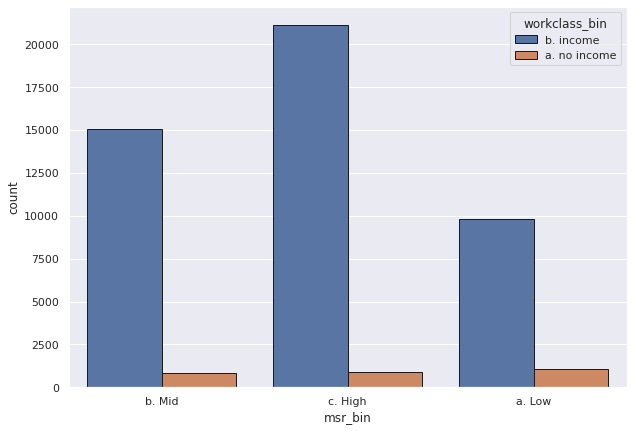

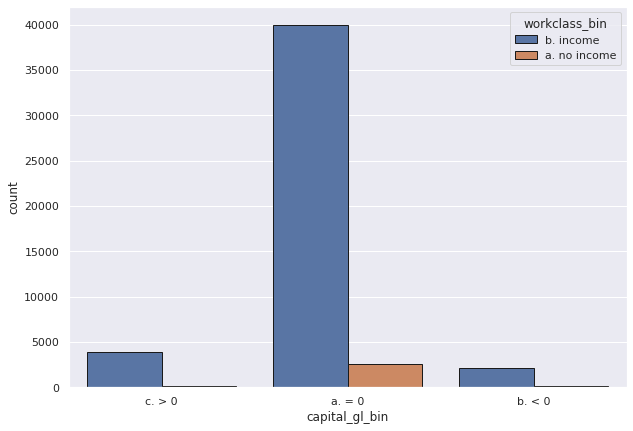

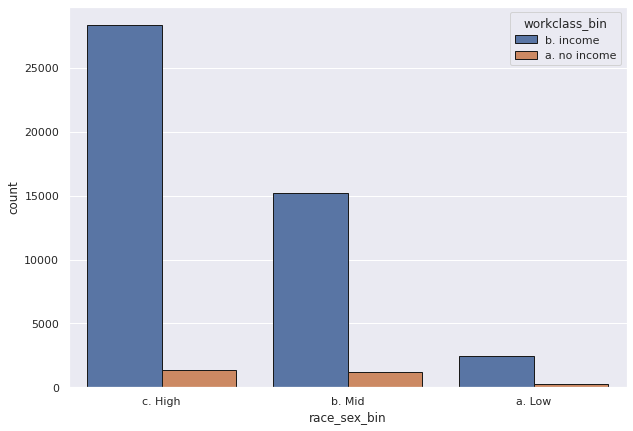

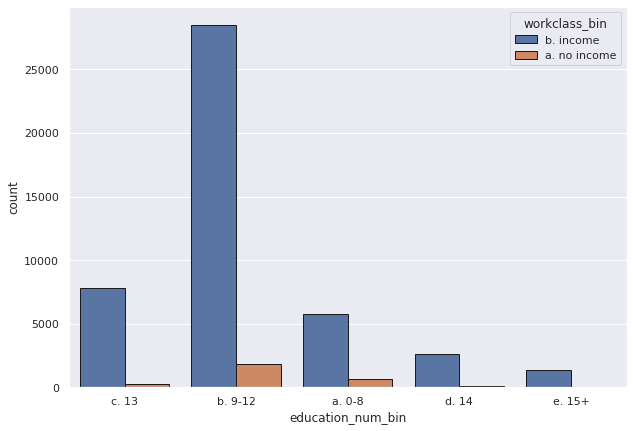

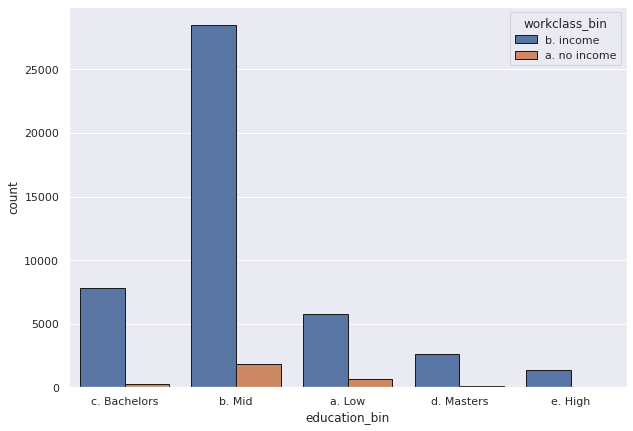

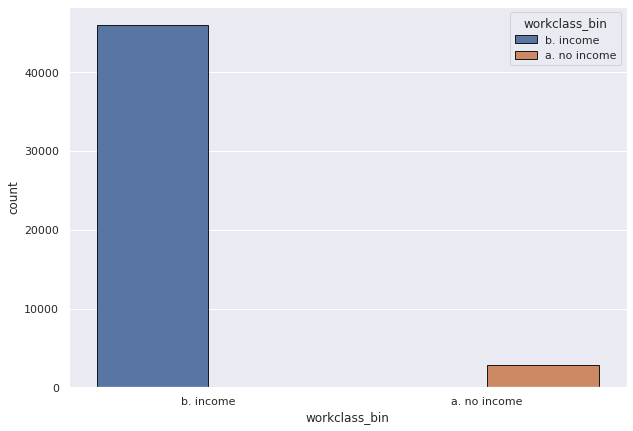

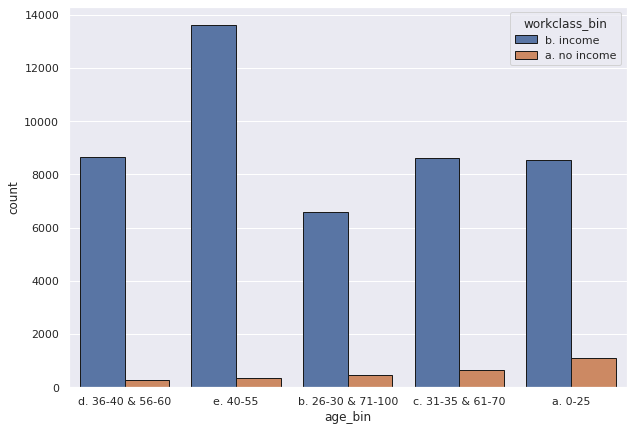

In [7]:
# comparing each columns with the workclass bin
for k in range(9):
    f, ax = plt.subplots(figsize = (10, 7))
    labels = city.iloc[:, k].unique()
    sns.set_theme(style='darkgrid')
    sns.countplot(data= city, x=city.columns[k], hue='workclass_bin', edgecolor = 'k')

    

### Preprocessing

In [5]:
train = city[city['flag']=='train']
test = city[city['flag']=='test']

x_train = train.iloc[:,0:-2]
x_test = test.iloc[:,0:-2]

y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]


## Encoding Categorical variables
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

### Training and Testing Data
##### Logistic Regression

Test data:


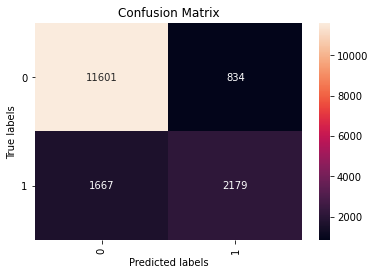

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



Train data:


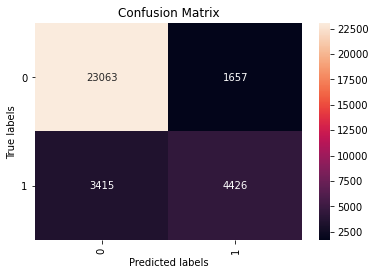

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24720
           1       0.73      0.56      0.64      7841

    accuracy                           0.84     32561
   macro avg       0.80      0.75      0.77     32561
weighted avg       0.84      0.84      0.84     32561



In [6]:
lr = LogisticRegression().fit(x_train, y_train)

## TEST DATA EVALUATION
lr_predictions = lr.predict(x_test)

print('Test data:')
## confusion matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
lr_labels = lr.classes_

ax = plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels); 
ax.yaxis.set_ticklabels(lr_labels);
plt.show()

report = classification_report(y_test, lr_predictions)


print(report)


## TRAIN DATA EVALUATION
lr_predictions = lr.predict(x_train)
print('\n\nTrain data:')
## confusion matrix
lr_cm = confusion_matrix(y_train, lr_predictions)
lr_labels = lr.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels); 
ax.yaxis.set_ticklabels(lr_labels);
plt.show()

report = classification_report(y_train, lr_predictions)


print(report)

##### XGBoost

In [7]:
## renaming columns
x_train.rename(columns={'capital_gl_bin_a. = 0':'capital_gl_bin_a. equals 0', 
                       'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0', 
                      'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'}, inplace =True)
x_test.rename(columns={'capital_gl_bin_a. = 0':'capital_gl_bin_a. equals 0', 
                       'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0', 
                      'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'}, inplace =True)

Test data:


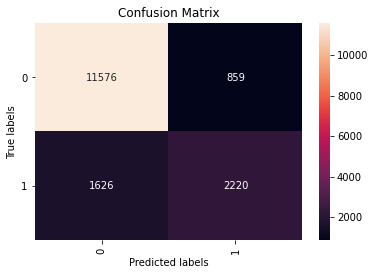

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



Train data:


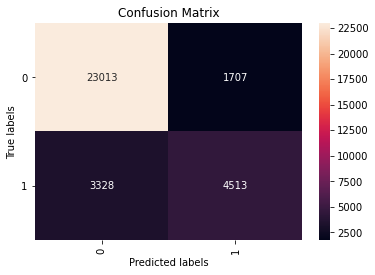

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24720
           1       0.73      0.58      0.64      7841

    accuracy                           0.85     32561
   macro avg       0.80      0.75      0.77     32561
weighted avg       0.84      0.85      0.84     32561



In [8]:
x = xgb.XGBClassifier().fit(x_train, y_train)

## TEST DATA EVALUATION
x_predictions = x.predict(x_test)

print('Test data:')
## confusion matrix
x_cm = confusion_matrix(y_test, x_predictions)
x_labels = x.classes_

ax = plt.subplot()
sns.heatmap(x_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(x_labels); 
ax.yaxis.set_ticklabels(x_labels);
plt.show()

report = classification_report(y_test, x_predictions)


print(report)


## TRAIN DATA EVALUATION
x_predictions = x.predict(x_train)
print('\n\nTrain data:')
## confusion matrix
x_cm = confusion_matrix(y_train, x_predictions)
x_labels = x.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(x_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(x_labels); 
ax.yaxis.set_ticklabels(x_labels);
plt.show()

report = classification_report(y_train, x_predictions)


print(report)



##### XGB hyperparameter Tuning

In [14]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
    }


    gsearch = GridSearchCV(estimator = x,
                           param_grid = param_tuning,                        
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 95.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 160.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 200.2min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [11]:
x = xgb.XGBClassifier(colsample_bytree = 0.7,
 learning_rate = 0.1,
 max_depth = 5,
 min_child_weight = 5,
 n_estimators = 100,
 subsample = 0.5).fit(x_train, y_train)

Test data:


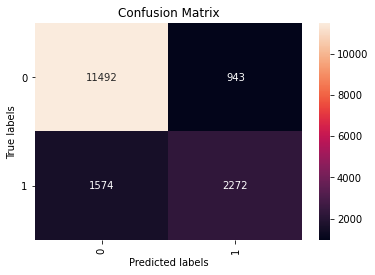

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.71      0.59      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.76      0.77     16281
weighted avg       0.84      0.85      0.84     16281



Train data:


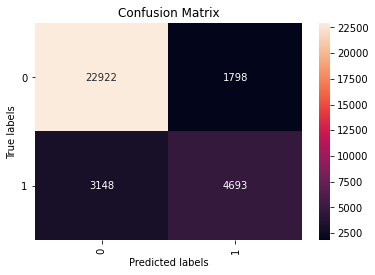

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     24720
           1       0.72      0.60      0.65      7841

    accuracy                           0.85     32561
   macro avg       0.80      0.76      0.78     32561
weighted avg       0.84      0.85      0.84     32561



In [12]:
## TEST DATA EVALUATION
x_predictions = x.predict(x_test)

print('Test data:')
## confusion matrix
x_cm = confusion_matrix(y_test, x_predictions)
x_labels = x.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(x_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(x_labels); 
ax.yaxis.set_ticklabels(x_labels);
plt.show()

report = classification_report(y_test, x_predictions)


print(report)


## TRAIN DATA EVALUATION
x_predictions = x.predict(x_train)
print('\n\nTrain data:')
## confusion matrix
x_cm = confusion_matrix(y_train, x_predictions)
x_labels = x.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(x_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(x_labels); 
ax.yaxis.set_ticklabels(x_labels);
plt.show()

report = classification_report(y_train, x_predictions)


print(report)

### Conclusion
XGBoost performs better between both algorithms and not by much. XGBoost could perform much better with more feature engineering and tuning.